## Import modules

In [1]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

warnings.filterwarnings("ignore")

## Ingest the Data

In [2]:
#load the dataset
retail_df = pd.read_csv("data/rfm_data.csv")

In [3]:
retail_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,10,658.89
2,12748,0,196,3739.23
3,12749,3,5,98.35
4,12820,3,4,58.20


## RFM Analysis

RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase **behavior** to divide customers into groups. <br> RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
- RECENCY (R): Days since last purchase 
- REQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.


## 1. Recency


To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

## 2. Frequency

Frequency helps us to know **how many times a customer purchased from us**. To do that we need to check how many invoices are registered by the same customer.

## 3. Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?** To do that, first, we will create a new column total cost to have the total price per invoice.

### Data Preprocessing

In [4]:
rfm_data=retail_df
rfm_data

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,10,658.89
2,12748,0,196,3739.23
3,12749,3,5,98.35
4,12820,3,4,58.20
...,...,...,...,...
3858,18280,277,1,23.70
3859,18281,180,1,5.04
3860,18282,7,2,38.25
3861,18283,3,16,66.75


## Feature Correlations

In [30]:
# Write your code here
# Hint : Use Corr function to create correlation matrix
rfm_data.corr()

,CustomerID,Recency,Frequency,Monetary
CustomerID,1.000000,-0.002597,-0.021642,0.001936
Recency,-0.002597,1.000000,-0.279236,-0.027727
Frequency,-0.021642,-0.279236,1.000000,0.156431
Monetary,0.001936,-0.027727,0.156431,1.000000


#### Plot Correlation Matrix

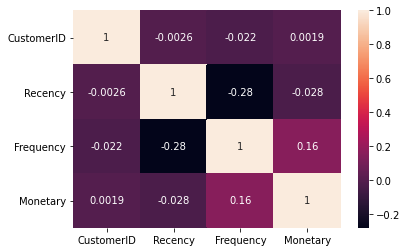

In [33]:
## Use Seaborn Heatmap to visualize correlation matrix
sns.heatmap(rfm_data.corr(),annot=True);

## Visualize feature distributions

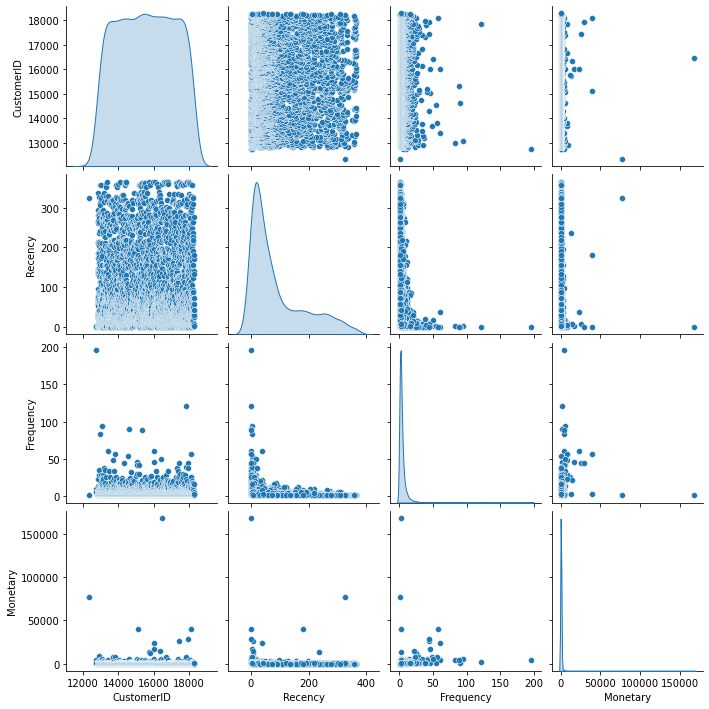

In [34]:
# Hint : Use Seaborn library
sns.pairplot(rfm_data,diag_kind='kde');

In [5]:
# Check Data Skewness 
## Hint : use skew function
rfm_data.skew()

CustomerID    -0.007288
Recency        1.235645
Frequency     10.476247
Monetary      40.156721
dtype: float64

In [6]:
rfm_data.describe()

,CustomerID,Recency,Frequency,Monetary
count,3863.000000,3863.000000,3863.000000,3863.000000
mean,15555.438519,87.537406,4.146259,288.208496
std,1575.752881,94.182509,6.936763,3266.521065
min,12346.000000,0.000000,1.000000,0.000000
25%,14200.000000,17.000000,1.000000,17.400000
50%,15561.000000,49.000000,2.000000,45.000000
75%,16911.000000,134.000000,5.000000,121.600000
max,18287.000000,365.000000,196.000000,168471.250000


## Option 1 - Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# Write your code here

sc = StandardScaler()
X = rfm_data
X = sc.fit_transform(rfm_data)

In [8]:
X

array([[-2.0370288 ,  2.52162889, -0.45362175, 23.54350231],
       [-1.78251433, -0.90832662,  0.84398129,  0.11349368],
       [-1.78187963, -0.92956473, 27.66111059,  1.05661901],
       ...,
       [ 1.73054702, -0.85523133, -0.30944363, -0.07653122],
       [ 1.73118172, -0.89770756,  1.70904997, -0.06780522],
       [ 1.73372052, -0.48356432, -0.16526552, -0.06362592]])

In [9]:
pd.DataFrame(X).skew()

0    -0.007288
1     1.235645
2    10.476247
3    40.156721
dtype: float64

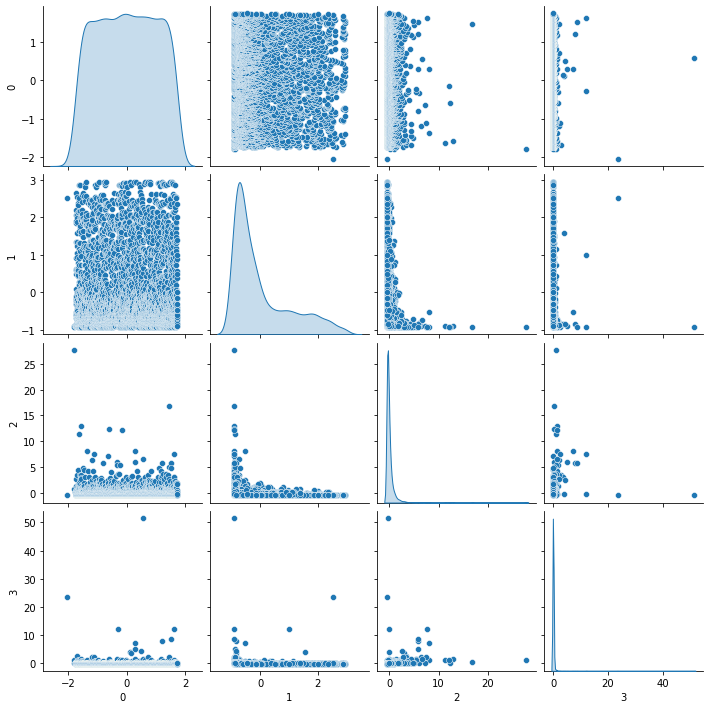

In [40]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde');

## Option 2 - Perform Log Transformation

In [10]:
# Use Log transformation to scale features
## Hint : use np.log function 
rfm_r_log = np.log(rfm_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [11]:
## merge all the tranformed features and create a dataframe
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
0,11.253944,5.784133,0.000000
1,6.490708,0.741937,2.302585
2,8.226662,-2.302585,5.278115
3,4.589549,1.131402,1.609438
4,4.065602,1.131402,1.386294


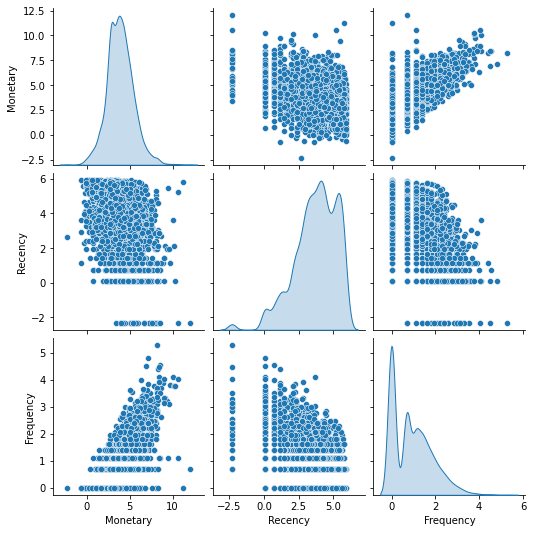

In [12]:
# Produce a scatter matrix for each pair of features in the data
sns.pairplot(log_data,diag_kind='kde');

In [44]:
# check data skeweness once again
log_data.skew()

Monetary     0.379215
Recency     -0.857050
Frequency    0.770850
dtype: float64

#### Do you observe change in the distributions for Frequency and Monetary & Recency? 

In [45]:
np.log(1)

0.0

In [46]:
np.log(10)

2.302585092994046

In [47]:
np.log(100)

4.605170185988092

In [48]:
np.log(1000)

6.907755278982137

In [49]:
np.log(10000)

9.210340371976184

In [50]:
np.log(100000)

11.512925464970229

#### Plot Correlation Matrix

In [ ]:
sns.heatmap(log_data.corr(),annot=True);

#  Type of Scalers

#### Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

$ \frac{x_i – min(x)} {max(x) – min(x)} $

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

> If the distribution is __not Gaussian__ or the standard deviation is very small, the min-max scaler works __better__.

> However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

The __StandardScaler__ assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$ \frac {x_i – mean(x)} {stdev(x)}$

If data is __not normally distributed, this is not the best scaler to use.__



In [ ]:
# Standardize Data *********************************************

# The mean and standard deviation are calculated for the feature and 
# then the feature is scaled based on:

# [xi–mean(x)]/stdev(x)

# If data is not normally distributed, this is not the best scaler to use.